<a href="https://colab.research.google.com/github/sohyun329/ML_Study/blob/main/%5BML%5D%EC%95%88%EC%A0%84_%EC%9A%B4%EC%A0%84%EC%9E%90_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


# 1. EDA

## 1-1 데이터 확인

In [3]:
import numpy as np
import pandas as pd

train = pd.read_csv('/content/gdrive/MyDrive/Data/porto-safe-driver/train.csv',index_col='id')
test = pd.read_csv('/content/gdrive/MyDrive/Data/porto-safe-driver/test.csv',index_col='id')
submission = pd.read_csv('/content/gdrive/MyDrive/Data/porto-safe-driver/sample_submission.csv',index_col='id')

In [3]:
train.shape, test.shape

((595212, 58), (892816, 57))

In [4]:
train.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
7,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
9,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
13,0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
16,0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
17,0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0


In [5]:
test.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
0,0,1,8,1,0,0,1,0,0,0,...,1,1,1,12,0,1,1,0,0,1
1,4,2,5,1,0,0,0,0,1,0,...,2,0,3,10,0,0,1,1,0,1
2,5,1,3,0,0,0,0,0,1,0,...,4,0,2,4,0,0,0,0,0,0
3,0,1,6,0,0,1,0,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,5,1,7,0,0,0,0,0,1,0,...,4,0,0,4,0,1,1,0,0,1


In [6]:
submission.head()

,target
id,
0,0.0364
1,0.0364
2,0.0364
3,0.0364
4,0.0364


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 595212 entries, 7 to 1488027
Data columns (total 58 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   target          595212 non-null  int64  
 1   ps_ind_01       595212 non-null  int64  
 2   ps_ind_02_cat   595212 non-null  int64  
 3   ps_ind_03       595212 non-null  int64  
 4   ps_ind_04_cat   595212 non-null  int64  
 5   ps_ind_05_cat   595212 non-null  int64  
 6   ps_ind_06_bin   595212 non-null  int64  
 7   ps_ind_07_bin   595212 non-null  int64  
 8   ps_ind_08_bin   595212 non-null  int64  
 9   ps_ind_09_bin   595212 non-null  int64  
 10  ps_ind_10_bin   595212 non-null  int64  
 11  ps_ind_11_bin   595212 non-null  int64  
 12  ps_ind_12_bin   595212 non-null  int64  
 13  ps_ind_13_bin   595212 non-null  int64  
 14  ps_ind_14       595212 non-null  int64  
 15  ps_ind_15       595212 non-null  int64  
 16  ps_ind_16_bin   595212 non-null  int64  
 17  ps_ind_17_bin 

<Axes: >

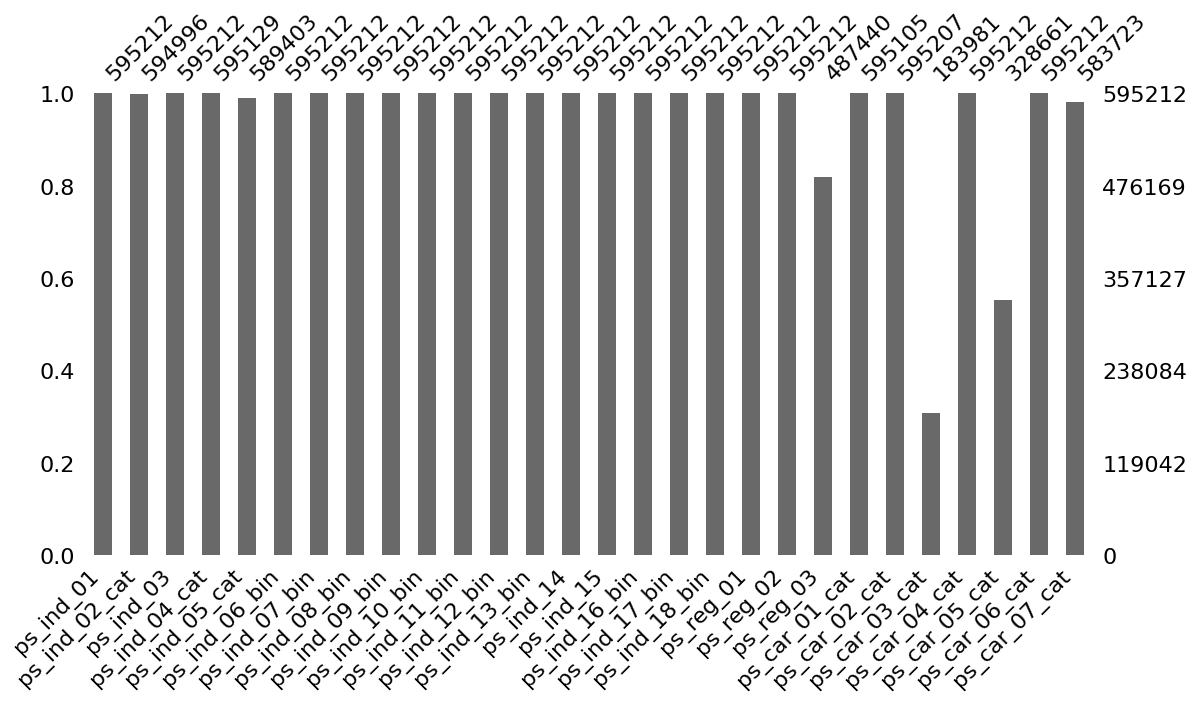

In [8]:
import numpy as np
import missingno as msno

train_copy = train.copy().replace(-1, np.NaN)

msno.bar(df=train_copy.iloc[:,1:29], figsize=(13,6))

<Axes: >

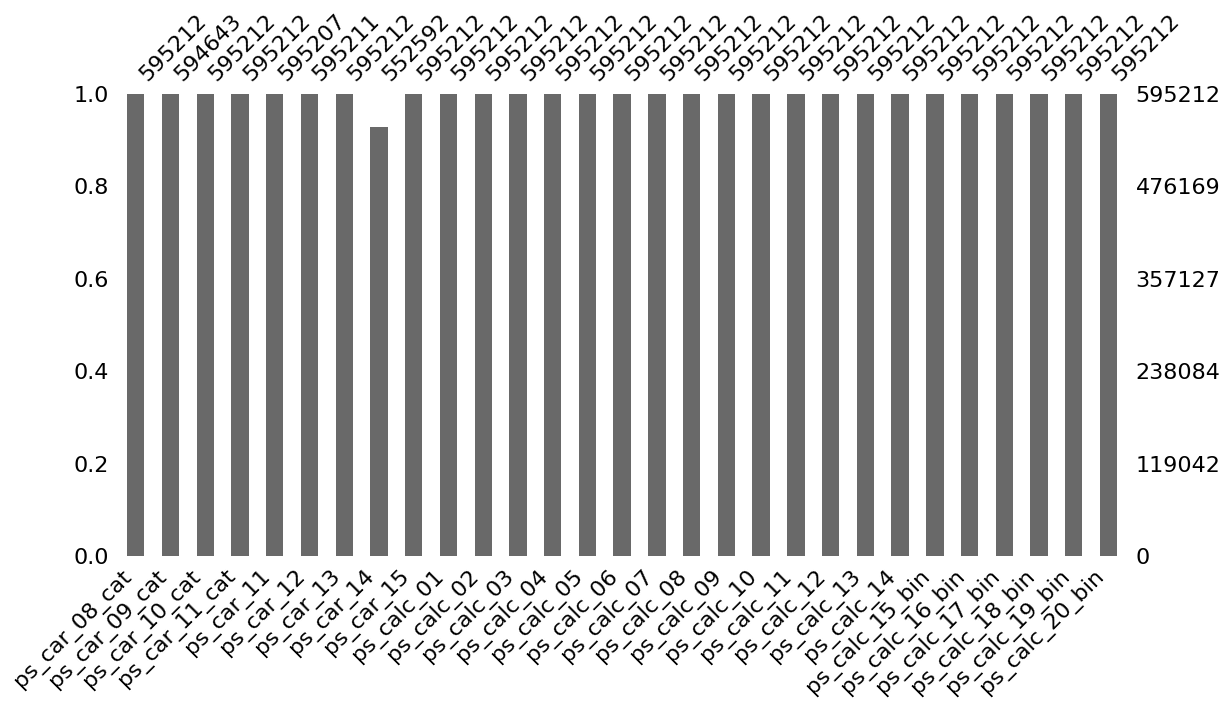

In [9]:
msno.bar(df=train_copy.iloc[:,29:], figsize=(13,6))

- 피처 요약표

In [10]:
def resumetable(df):
  print(f'데이터셋 형상 : {df.shape}')
  summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
  summary['결측값 개수'] = (df==-1).sum().values # 피처별 -1 개수
  summary['고유값 개수'] = df.nunique().values
  summary['데이터 종류'] = None
  for col in df.columns:
    if 'bin' in col or col == 'target':
      summary.loc[col, '데이터 종류'] = '이진형'
    elif 'cat' in col:
      summary.loc[col, '데이터 종류'] = '명목형'
    elif df[col].dtype == float:
      summary.loc[col, '데이터 종류'] = '연속형'
    elif df[col].dtype == int:
      summary.loc[col, '데이터 종류'] = '순서형'

  return summary

In [11]:
summary = resumetable(train)
summary

데이터셋 형상 : (595212, 58)


,데이터 타입,결측값 개수,고유값 개수,데이터 종류
target,int64,0,2,이진형
ps_ind_01,int64,0,8,순서형
ps_ind_02_cat,int64,216,5,명목형
ps_ind_03,int64,0,12,순서형
ps_ind_04_cat,int64,83,3,명목형
ps_ind_05_cat,int64,5809,8,명목형
ps_ind_06_bin,int64,0,2,이진형
ps_ind_07_bin,int64,0,2,이진형
ps_ind_08_bin,int64,0,2,이진형
ps_ind_09_bin,int64,0,2,이진형


In [12]:
summary[summary['데이터 종류']=='명목형'].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object')

In [13]:
summary[summary['데이터 타입']=='float64'].index

Index(['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_13',
       'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03'],
      dtype='object')

## 1-2 데이터 시각화

In [14]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

- 타깃값 분포

Text(0.5, 1.0, 'Target Distribution')

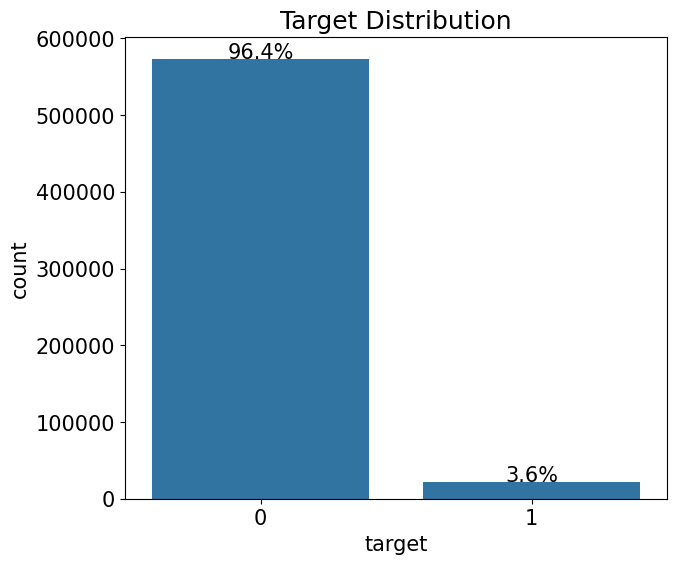

In [15]:
def write_percent(ax, total_size):
  '''도형 객체를 순회하며 막대 그래프 상단에 타깃값 비율 표시'''
  for patch in ax.patches:
    height = patch.get_height() # 도형 높이(데이터 개수)
    width = patch.get_width() # 도형 너비
    left_coord = patch.get_x() # 도형 왼쪽 테두리의 x축 위치
    percent = height/total_size*100 # 타깃값 비율

    # (x,y)좌표에 텍스트 입력
    ax.text(left_coord+width/2.0, # x축 위치
            height+total_size*0.001, # y축 위치
            '{:1.1f}%'.format(percent), # 입력 텍스트
            ha='center' # 가운데 정렬
            )

mpl.rc('font',size=15)
plt.figure(figsize=(7,6))

ax = sns.countplot(x='target',data=train)
write_percent(ax,len(train))
ax.set_title('Target Distribution')

- 이진피처

In [16]:
import matplotlib.gridspec as gridspec

def plot_target_ratio_by_features(df, features, num_rows, num_cols, size=(12,18)):

  mpl.rc('font', size=9)
  plt.figure(figsize=size) # 전체 Figure 크기 설정
  grid = gridspec.GridSpec(num_rows, num_cols) # 서브플롯 배치
  plt.subplots_adjust(wspace=0.3, hspace=0.3) # 서브플롯 좌우/상하 여백 설정

  for idx, feature in enumerate(features):
    ax = plt.subplot(grid[idx])
    # ax축에 고유값별 타깃값 1 비율을 막대 그래프로 그리기
    sns.barplot(x=feature, y='target', data=df, palette='Set2', ax=ax)

<ipython-input-16-e6a94e6eecd5>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='target', data=df, palette='Set2', ax=ax)
<ipython-input-16-e6a94e6eecd5>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='target', data=df, palette='Set2', ax=ax)
<ipython-input-16-e6a94e6eecd5>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='target', data=df, palette='Set2', ax=ax)
<ipython-input-16-e6a94e6eecd5>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.1

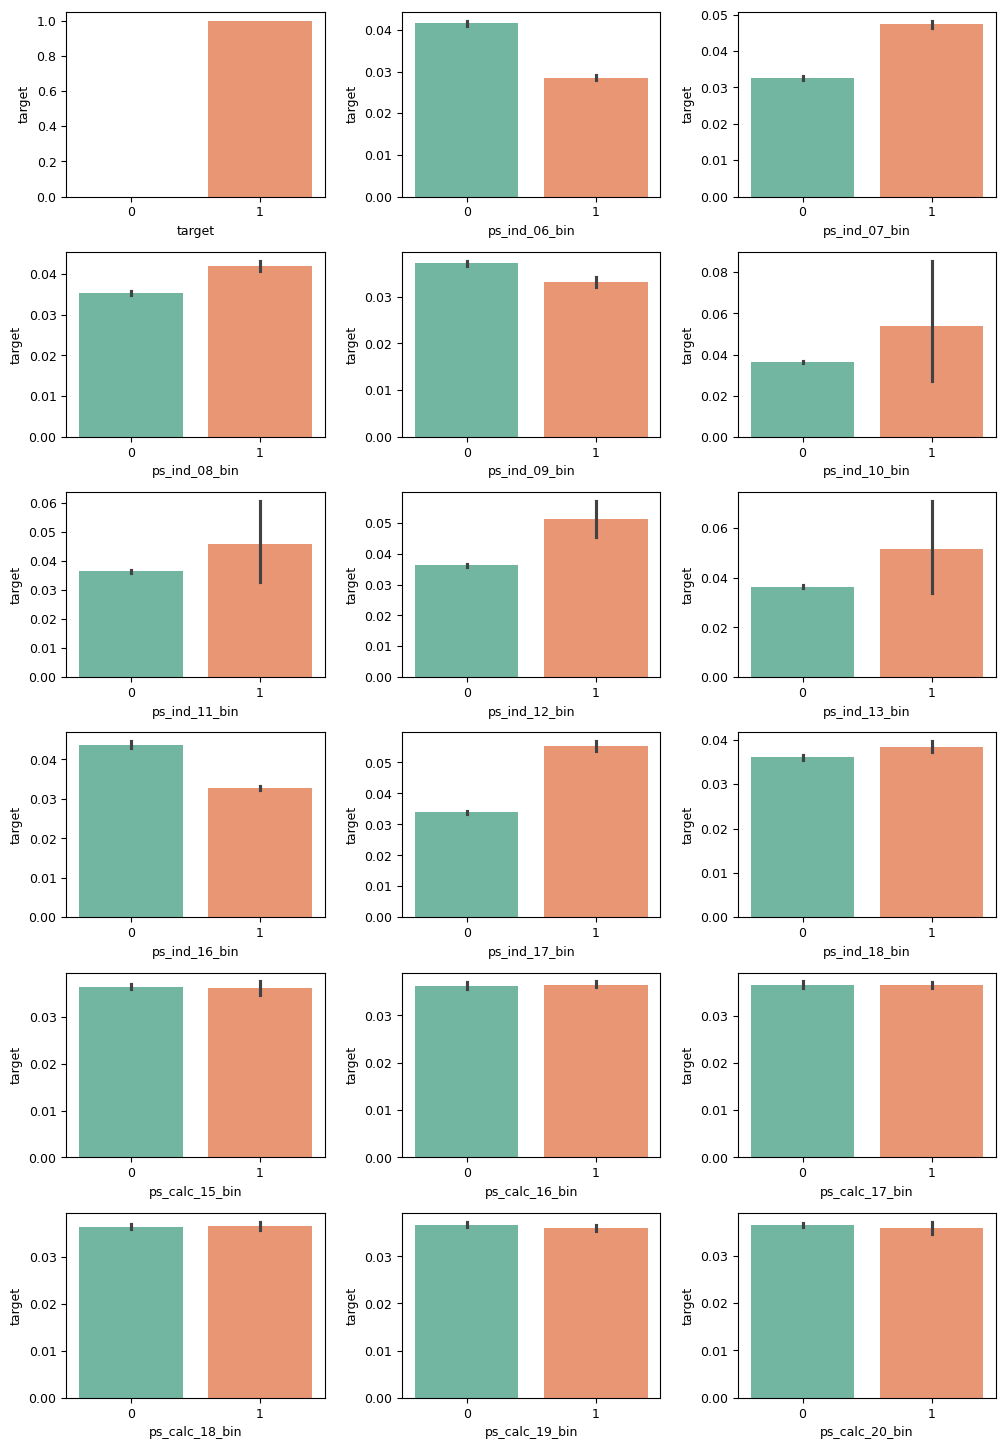

In [17]:
bin_features = summary[summary['데이터 종류']=='이진형'].index # 이진 피처
# 이진 피처 고유값별 타깃값 1 비율을 막대 그래프로 그리기
plot_target_ratio_by_features(train, bin_features, 6,3)

- 명목형 피처

<ipython-input-16-e6a94e6eecd5>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='target', data=df, palette='Set2', ax=ax)
<ipython-input-16-e6a94e6eecd5>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='target', data=df, palette='Set2', ax=ax)
<ipython-input-16-e6a94e6eecd5>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='target', data=df, palette='Set2', ax=ax)
<ipython-input-16-e6a94e6eecd5>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.1

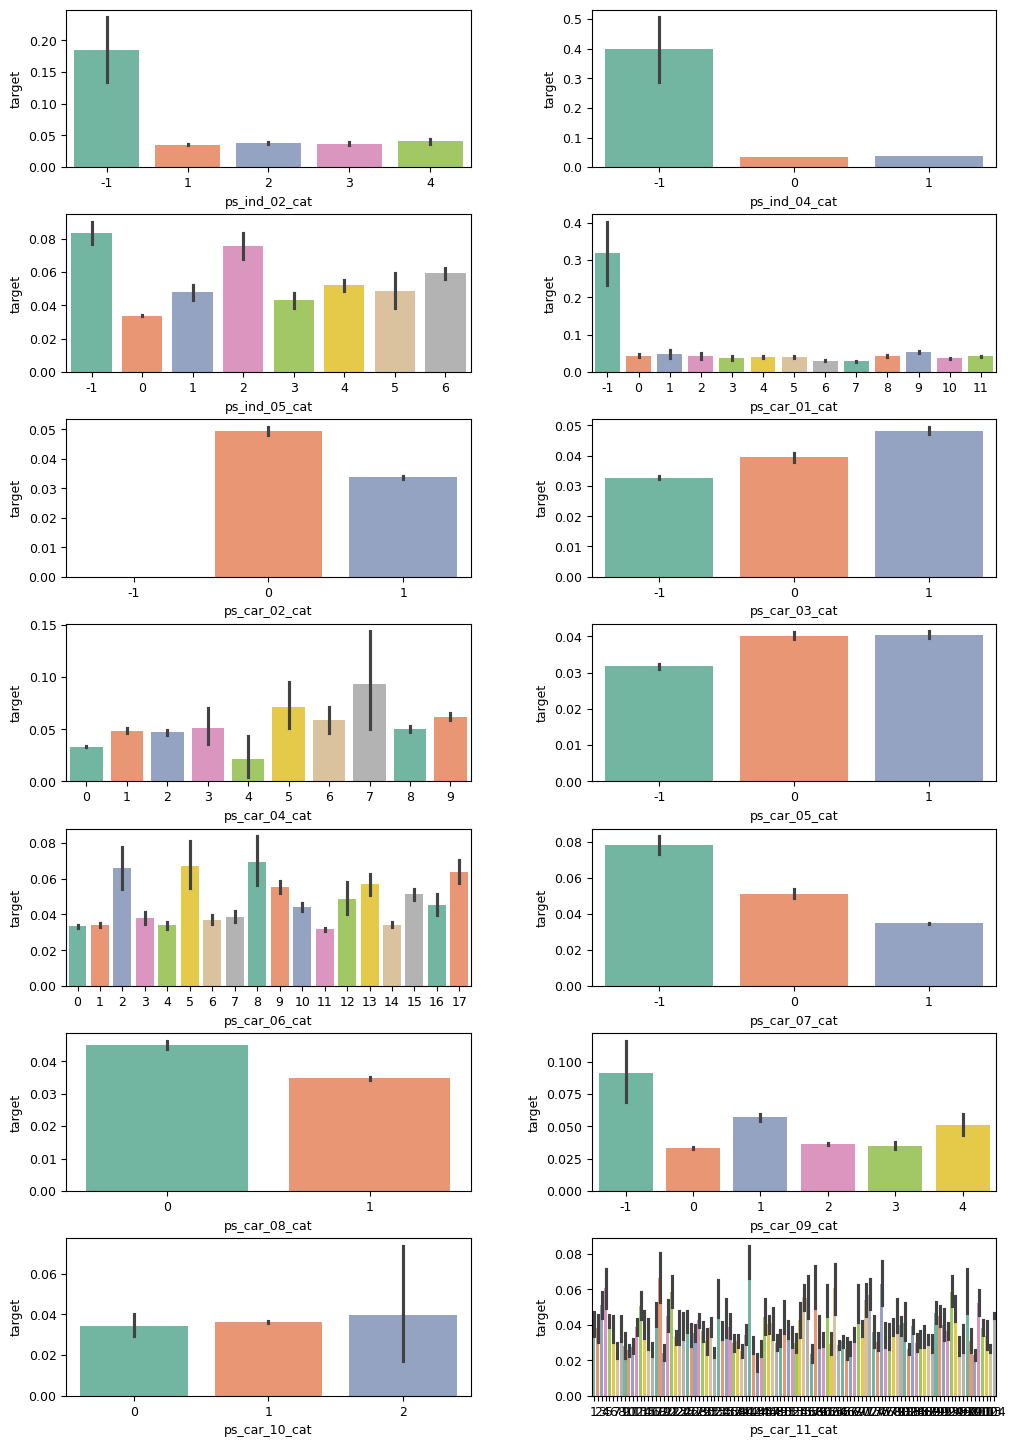

In [18]:
nom_features = summary[summary['데이터 종류']=='명목형'].index

plot_target_ratio_by_features(train, nom_features, 7, 2)

- 순서형 피처

<ipython-input-16-e6a94e6eecd5>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='target', data=df, palette='Set2', ax=ax)
<ipython-input-16-e6a94e6eecd5>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='target', data=df, palette='Set2', ax=ax)
<ipython-input-16-e6a94e6eecd5>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='target', data=df, palette='Set2', ax=ax)
<ipython-input-16-e6a94e6eecd5>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.1

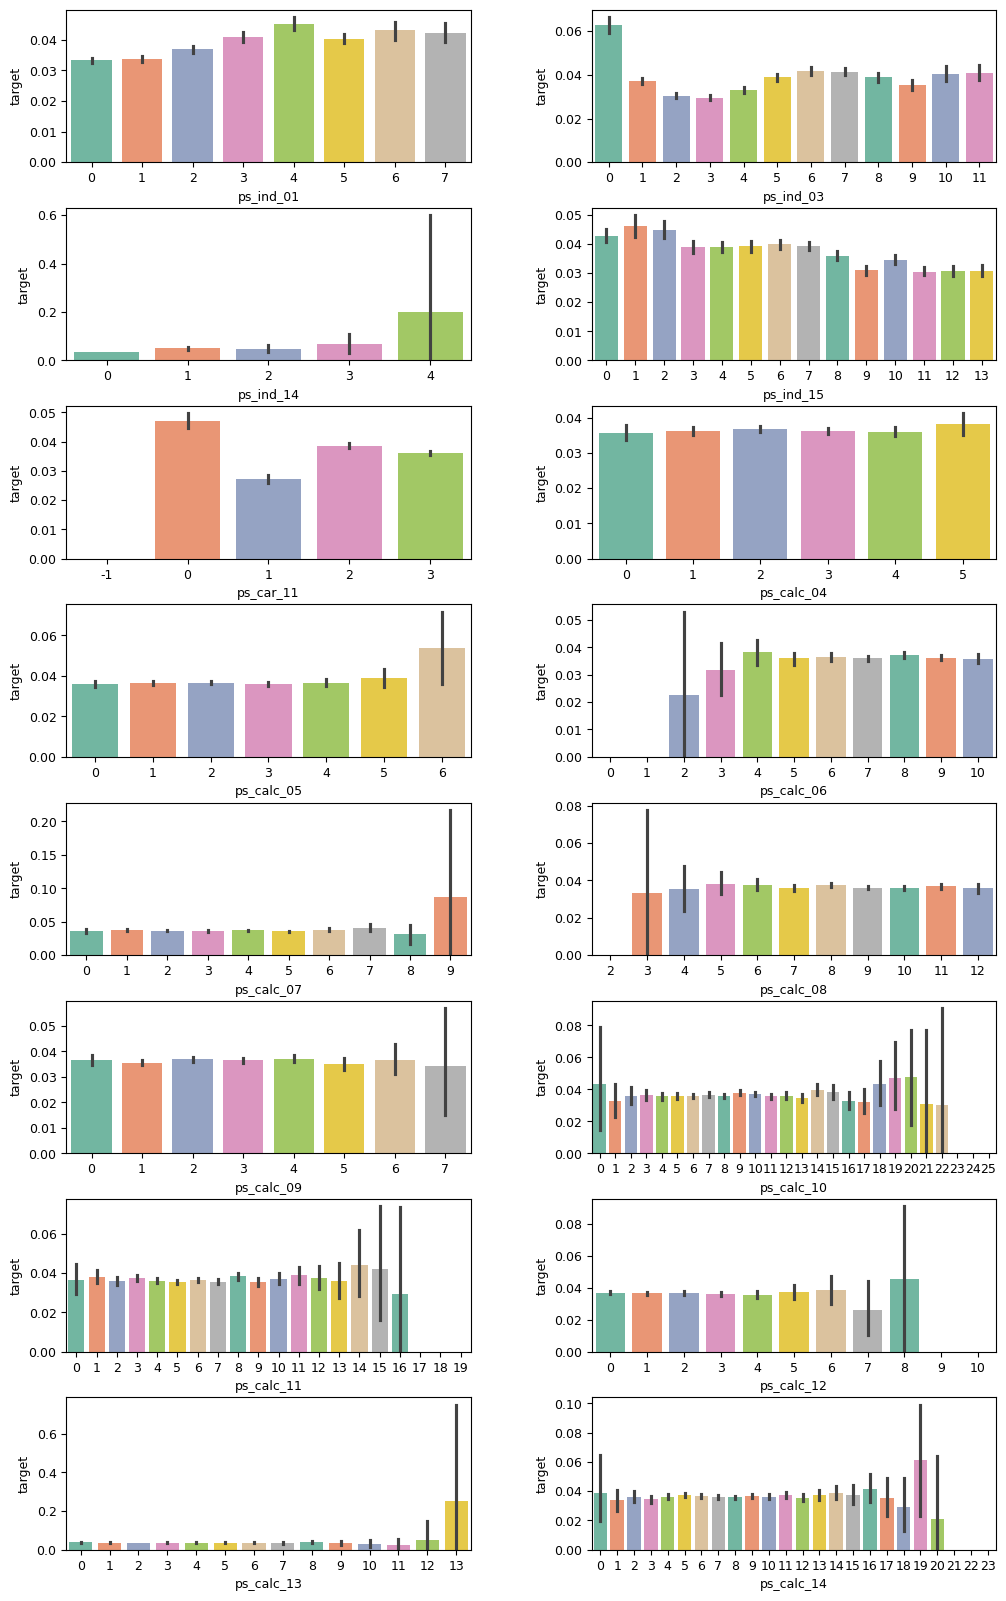

In [19]:
ord_features = summary[summary['데이터 종류']=='순서형'].index
plot_target_ratio_by_features(train, ord_features, 8, 2, (12,20))

- 연속형 피처

In [20]:
pd.cut([1.0, 1.5, 2.1, 2.7, 3.5, 4.0], 3)

[(0.997, 2.0], (0.997, 2.0], (2.0, 3.0], (2.0, 3.0], (3.0, 4.0], (3.0, 4.0]]
Categories (3, interval[float64, right]): [(0.997, 2.0] < (2.0, 3.0] < (3.0, 4.0]]

<ipython-input-21-41d579838f95>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cont_feature, y='target', data=train, palette='Set2', ax=ax)
<ipython-input-21-41d579838f95>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cont_feature, y='target', data=train, palette='Set2', ax=ax)
<ipython-input-21-41d579838f95>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cont_feature, y='target', data=train, palette='Set2', ax=ax)
<ipython-input-21-41d579838f95>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and

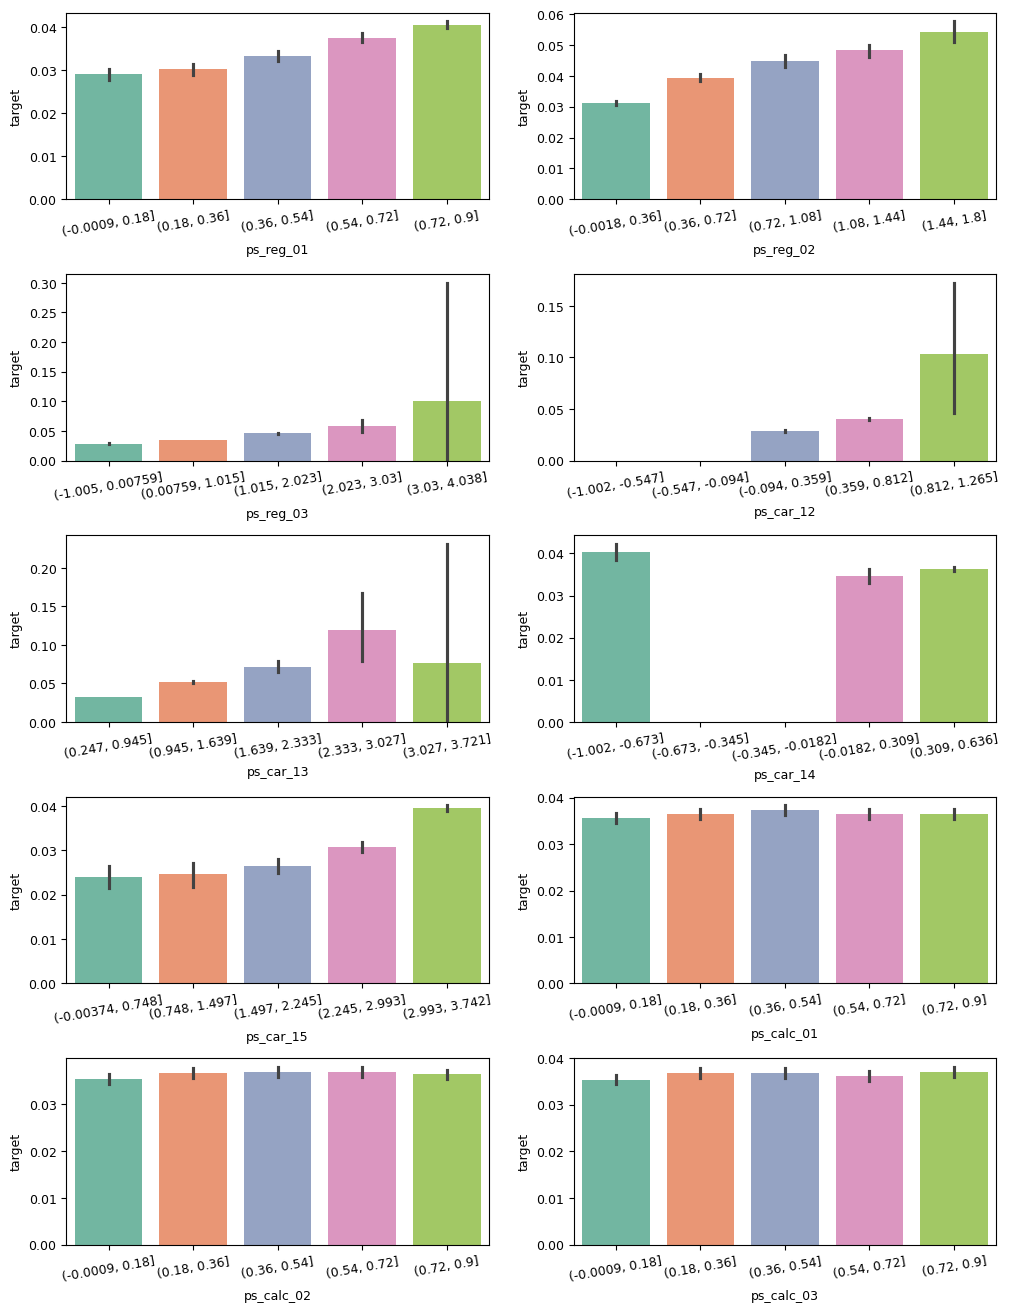

In [21]:
cont_features = summary[summary['데이터 종류']=='연속형'].index

plt.figure(figsize=(12,16))
grid = gridspec.GridSpec(5,2)
plt.subplots_adjust(wspace=0.2, hspace=0.4)

for idx, cont_feature in enumerate(cont_features):
  # 값을 5개 구간으로 나누기
  train[cont_feature] = pd.cut(train[cont_feature],5)

  ax = plt.subplot(grid[idx])
  sns.barplot(x=cont_feature, y='target', data=train, palette='Set2', ax=ax)
  ax.tick_params(axis='x', labelrotation=10)

- 연속형 피처2

In [22]:
train_copy = train_copy.dropna()

<Axes: >

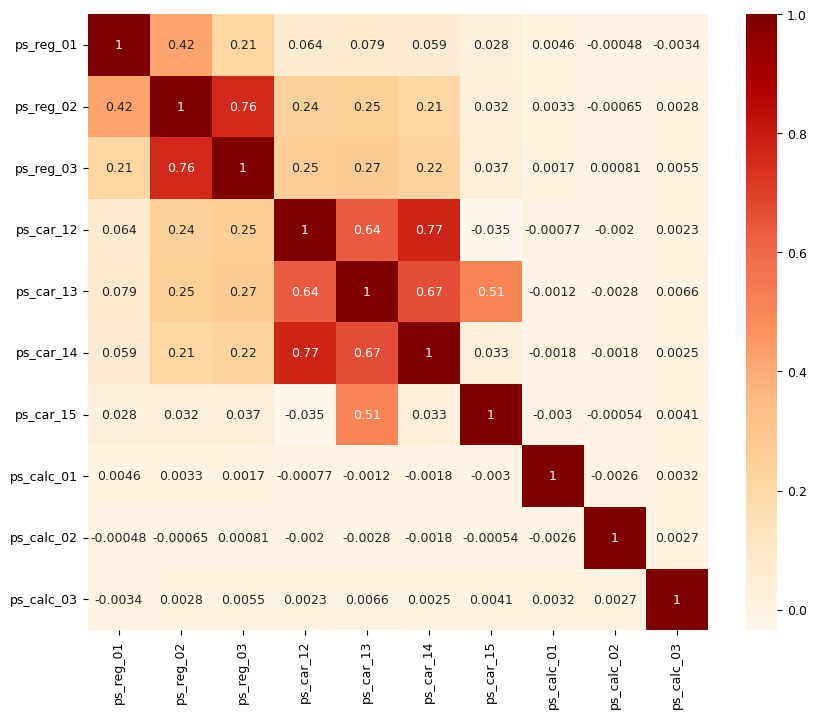

In [23]:
plt.figure(figsize=(10,8))
cont_corr = train_copy[cont_features].corr()
sns.heatmap(cont_corr, annot=True, cmap='OrRd')

# 2. 베이스라인 모델

In [23]:
train = pd.read_csv('/content/gdrive/MyDrive/Data/porto-safe-driver/train.csv',index_col='id')
test = pd.read_csv('/content/gdrive/MyDrive/Data/porto-safe-driver/test.csv',index_col='id')
submission = pd.read_csv('/content/gdrive/MyDrive/Data/porto-safe-driver/sample_submission.csv',index_col='id')

## 2-1 피처 엔지니어링

- 데이터 병합

In [24]:
all_data = pd.concat([train, test], ignore_index=True)
all_data = all_data.drop('target', axis=1) # 타깃값 제거

In [25]:
all_features = all_data.columns # 전체 피처
all_features

Index(['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      dtype='obj

- 명목형 피처 원-핫 인코딩

In [26]:
from sklearn.preprocessing import OneHotEncoder

# 명목형 피처 추출
cat_features = [feature for feature in all_features if 'cat' in feature]

onehot_encoder = OneHotEncoder() # 원-핫 인코더 객체 생성
# 인코딩
encoded_cat_matrix = onehot_encoder.fit_transform(all_data[cat_features])

encoded_cat_matrix

<1488028x184 sparse matrix of type '<class 'numpy.float64'>'
	with 20832392 stored elements in Compressed Sparse Row format>

- 필요 없는 피처 제거

In [27]:
# 추가로 제거할 피처
drop_features = ['ps_ind_14', 'ps_ind_10_bin', 'ps_ind_11_bin',
                 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_14']

# '1) 명목형 피처, 2) calc 분류의 피처, 3) 추가 제거할 피처'를 제외한 피처
remaining_features = [feature for feature in all_features
                      if ('cat' not in feature and
                          'calc' not in feature and
                          feature not in drop_features)]

In [28]:
from scipy import sparse

all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data[remaining_features]),
                               encoded_cat_matrix],
                              format='csr')

- 데이터 분할

In [29]:
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기
X = all_data_sprs[:num_train]
X_test = all_data_sprs[num_train:]

y = train['target'].values

## 2-2 평가지표 계산 함수 작성

- 지니계수 : 경제학엥서 소득 불평등 정도를 나타내는 지표
- 지니계수가 작을수록 소득 수준 평등, 클수록 불평등
- 로렌츠 곡선 : 인구 누적 비율과 해당 소득 누적 점유율을 연결한 선
- 머신러닝에서 지니계수는 모델의 예측 성능을 측정하는데 쓰인다.
- 예측값을 크기순으로 정렬해서 로렌츠 곡선을 구한다.
- (2*ROC AUC)-1과 동일

- 정규화 지니계수 계산 함수
  - 값이 0에 가까울수록 성능 안좋음, 1에 가까울수록 성능이 좋음
  - (예측 값에 대한 지니계수) / (예측이 완벽할 때의 지니계수)
  - 예측값에 대한 지니 계수 : 예측값과 실제값으로 구한 지니계수
  - 예측이 완벽할 때의 지니계수 : 실젯값과 실젯값으로 구한 지니계수

In [30]:
import numpy as np

def eval_gini(y_true, y_pred):
    # 실제값과 예측값의 크기가 같은지 확인 (값이 다르면 오류 발생)
    assert y_true.shape == y_pred.shape

    n_samples = y_true.shape[0]                      # 데이터 개수
    L_mid = np.linspace(1 / n_samples, 1, n_samples) # 대각선 값

    # 1) 예측값에 대한 지니계수
    pred_order = y_true[y_pred.argsort()] # y_pred 크기순으로 y_true 값 정렬
    L_pred = np.cumsum(pred_order) / np.sum(pred_order) # 로렌츠 곡선
    G_pred = np.sum(L_mid - L_pred)       # 예측 값에 대한 지니계수

    # 2) 예측이 완벽할 때 지니계수
    true_order = y_true[y_true.argsort()] # y_true 크기순으로 y_true 값 정렬
    L_true = np.cumsum(true_order) / np.sum(true_order) # 로렌츠 곡선
    G_true = np.sum(L_mid - L_true)       # 예측이 완벽할 때 지니계수

    # 정규화된 지니계수
    return G_pred / G_true


In [31]:
def gini(preds, dtrain):
    labels = dtrain.get_label()
    return 'gini', eval_gini(labels, preds), True # 반환값

## 2-3 모델 훈련 및 성능 검증

### OOF 예측 방식
- K 폴드 교차 검증을 수행하면서 각 폴드마다 테스트 데이터로 예측하는 방식
- K 폴드 교차 검증을 하면서 폴드마다 1) 훈련 데이터로 모델 훈련 ➡️ 2) 검증 데이터로 모델 성능 측정 ➡️ 3) 테스트 데이터로 최종 타깃 확률 예측
- 절차
  - 전체 훈련 데이터 K개 그룹으로 분할
  - K개 그룹 중 한 그룹은 검증 데이터, 나머지 K-1개 그룹은 훈련 데이터로 지정
  - 훈련 데이터로 모델 훈련
  - 훈련된 모델을 이용해 검증 데이터로 타깃 확률 예측, 전체 테스트 데이터로도 타깃 확률 예측
  - 검증 데이터로 구한 예측 확률과 테스트 데이터로 구한 예측 확률 기록
  - 검증 데이터를 다른 그룹으로 바꿔가며 2~5번 전차를 총 K번 반복
  - K개 그룹의 검증 데이터로 예측한 확률을 훈련 데이터 실제 타깃값과 비교해 성능 평가점수 계산, 이 점수로 모델 성능 가늠해볼 수 있음
  - 테스트 데이터로 구한 K개 예측 확률의 평균 구함. 이 값이 최종 예측 확률이며, 제출해야하는 값
- 장점
  - 과대적합 방지
  - 앙상블 효과가 있어 모델 성능 향상
    - 앙상블 : 같은 훈련 데이터셋으로 훈련한 2개 이상 모델의 예측 결과를 결합하는 기법

- OOF 방식으로 LightGBM 훈련

In [32]:
from sklearn.model_selection import StratifiedKFold

# 층화 K 폴드 교차 검증기
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1991)

In [33]:
params = {'objective': 'binary',
          'learning_rate': 0.01,
          'force_row_wise': True,
          'random_state': 0}

In [34]:
# OOF 방식으로 훈련된 모델로 검증 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_val_preds = np.zeros(X.shape[0])
# OOF 방식으로 훈련된 모델로 테스트 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_test_preds = np.zeros(X_test.shape[0])

In [35]:
import lightgbm as lgb

# OOF 방식으로 모델 훈련, 검증, 예측
for idx, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
    # 각 폴드를 구분하는 문구 출력
    print('#'*40, f'폴드 {idx+1} / 폴드 {folds.n_splits}', '#'*40)

    # 훈련용 데이터, 검증용 데이터 설정
    X_train, y_train = X[train_idx], y[train_idx]
    X_valid, y_valid = X[valid_idx], y[valid_idx]

    # LightGBM 전용 데이터셋 생성
    dtrain = lgb.Dataset(X_train, y_train)  # LightGBM 전용 훈련 데이터셋
    dvalid = lgb.Dataset(X_valid, y_valid)  # LightGBM 전용 검증 데이터셋

    # LightGBM 모델 훈련
    lgb_model = lgb.train(
        params=params,  # 훈련용 하이퍼파라미터
        train_set=dtrain,  # 훈련 데이터셋
        num_boost_round=1000,  # 부스팅 반복 횟수
        valid_sets=[dvalid],  # 성능 평가용 검증 데이터셋
        feval=gini,  # 검증용 평가지표
        callbacks=[
            lgb.early_stopping(stopping_rounds=100),  # 조기 종료 설정
            lgb.log_evaluation(period=100)  # 100번째마다 점수 출력
        ]
    )

    # 테스트 데이터를 활용해 OOF 예측
    oof_test_preds += lgb_model.predict(X_test) / folds.n_splits
    # 모델 성능 평가를 위한 검증 데이터 타깃값 예측
    oof_val_preds[valid_idx] += lgb_model.predict(X_valid)

    # 검증 데이터 예측 확률에 대한 정규화 지니계수
    gini_score = eval_gini(y_valid, oof_val_preds[valid_idx])
    print(f'폴드 {idx+1} 지니계수 : {gini_score}\n')


######################################## 폴드 1 / 폴드 5 ########################################
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Total Bins 1095
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.153354	valid_0's gini: 0.261651
[200]	valid_0's binary_logloss: 0.152426	valid_0's gini: 0.275704
[300]	valid_0's binary_logloss: 0.152023	valid_0's gini: 0.282277
[400]	valid_0's binary_logloss: 0.1518	valid_0's gini: 0.286648
[500]	valid_0's binary_logloss: 0.151713	valid_0's gini: 0.287944
[600]	valid_0's binary_logloss: 0.151672	valid_0's gini: 0.288637
[700]	valid_0's binary_logloss: 0.151659	valid_0's gini: 0.288939
Early stopping, best iteration is:
[681]	valid_0'

In [36]:
print('OOF 검증 데이터 지니계수:', eval_gini(y, oof_val_preds))

OOF 검증 데이터 지니계수: 0.2804995714877777


## 2-4 예측 및 결과 제출

In [51]:
submission['target'] = oof_test_preds
submission.to_csv('submission01.csv')

# 3. 성능개선 1 : LightGBM 모델

In [37]:
train = pd.read_csv('/content/gdrive/MyDrive/Data/porto-safe-driver/train.csv',index_col='id')
test = pd.read_csv('/content/gdrive/MyDrive/Data/porto-safe-driver/test.csv',index_col='id')
submission = pd.read_csv('/content/gdrive/MyDrive/Data/porto-safe-driver/sample_submission.csv',index_col='id')

## 3-1 피처 엔지니어링

- 데이터 병합

In [38]:
all_data = pd.concat([train, test], ignore_index=True)
all_data = all_data.drop('target', axis=1) # 타깃값 제거

all_features = all_data.columns # 전체 피처

- 명목형 피처 원-핫 인코딩

In [39]:
from sklearn.preprocessing import OneHotEncoder

# 명목형 피처
cat_features = [feature for feature in all_features if 'cat' in feature]

# 원-핫 인코딩 적용
onehot_encoder = OneHotEncoder()
encoded_cat_matrix = onehot_encoder.fit_transform(all_data[cat_features])

- 파생 피처 추가

In [40]:
# '데이터 하나당 결측값 개수'를 파생 피처로 추가
all_data['num_missing'] = (all_data==-1).sum(axis=1)

In [41]:
# 명목형 피처, calc 분류의 피처를 제외한 피처
remaining_features = [feature for feature in all_features
                      if ('cat' not in feature and 'calc' not in feature)]
# num_missing을 remaining_features에 추가
remaining_features.append('num_missing')

In [42]:
# 분류가 ind인 피처
ind_features = [feature for feature in all_features if 'ind' in feature]

is_first_feature = True
for ind_feature in ind_features:
    if is_first_feature:
        all_data['mix_ind'] = all_data[ind_feature].astype(str) + '_'
        is_first_feature = False
    else:
        all_data['mix_ind'] += all_data[ind_feature].astype(str) + '_'

In [43]:
all_data['mix_ind']

,mix_ind
0,2_2_5_1_0_0_1_0_0_0_0_0_0_0_11_0_1_0_
1,1_1_7_0_0_0_0_1_0_0_0_0_0_0_3_0_0_1_
2,5_4_9_1_0_0_0_1_0_0_0_0_0_0_12_1_0_0_
3,0_1_2_0_0_1_0_0_0_0_0_0_0_0_8_1_0_0_
4,0_2_0_1_0_1_0_0_0_0_0_0_0_0_9_1_0_0_
...,...
1488023,0_1_6_0_0_0_1_0_0_0_0_0_0_0_2_0_0_1_
1488024,5_3_5_1_0_0_0_1_0_0_0_0_0_0_11_1_0_0_
1488025,0_1_5_0_0_1_0_0_0_0_0_0_0_0_5_0_0_1_
1488026,6_1_5_1_0_0_0_0_1_0_0_0_0_0_13_1_0_0_


In [44]:
all_data['ps_ind_02_cat'].value_counts()

,count
ps_ind_02_cat,
1,1079327
2,309747
3,70172
4,28259
-1,523


In [45]:
all_data['ps_ind_02_cat'].value_counts().to_dict()

{1: 1079327, 2: 309747, 3: 70172, 4: 28259, -1: 523}

In [46]:
cat_count_features = []
for feature in cat_features+['mix_ind']:
  val_counts_dict = all_data[feature].value_counts().to_dict()
  all_data[f'{feature}_count'] = all_data[feature].apply(lambda x:val_counts_dict[x])
  cat_count_features.append(f'{feature}_count')

In [47]:
cat_count_features

['ps_ind_02_cat_count',
 'ps_ind_04_cat_count',
 'ps_ind_05_cat_count',
 'ps_car_01_cat_count',
 'ps_car_02_cat_count',
 'ps_car_03_cat_count',
 'ps_car_04_cat_count',
 'ps_car_05_cat_count',
 'ps_car_06_cat_count',
 'ps_car_07_cat_count',
 'ps_car_08_cat_count',
 'ps_car_09_cat_count',
 'ps_car_10_cat_count',
 'ps_car_11_cat_count',
 'mix_ind_count']

- 필요 없는 피처 제거

In [48]:
from scipy import sparse

# 필요없는 피처들
drop_features = ['ps_ind_14','ps_ind_10_bin','ps_ind_11_bin',
                 'ps_ind_12_bin','ps_ind_13_bin','ps_car_14']

# remaining_features, cat_count_features에서 drop_features를 제거한 데이터
all_data_remaining = all_data[remaining_features+cat_count_features].drop(drop_features, axis=1)
# 데이터 합치기
all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data_remaining),
                               encoded_cat_matrix],
                              format='csr')

- 데이터 분할

In [49]:
num_train = len(train)

X = all_data_sprs[:num_train]
X_test = all_data_sprs[num_train:]

y = train['target'].values

## 3-2 하이퍼파라미터 최적화

- 데이터셋 준비

In [50]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.2,random_state=0)

# 베이지안 최적화용 데이터셋
bayes_dtrain = lgb.Dataset(X_train, y_train)
bayes_dvalid = lgb.Dataset(X_valid, y_valid)

- 하이퍼파라미터 범위 설정

In [51]:
# 베이지안 최적화를 위한 하이퍼파라미터 범위
param_bounds = {
    'num_leaves':(30, 40),
    'lambda_l1':(0.7, 0.9),
    'lambda_l2':(0.9, 1),
    'feature_fraction':(0.6, 0.7),
    'bagging_fraction':(0.6, 0.7),
    'min_child_samples':(6,10),
    'min_child_weight':(10,40)
}

# 값이 고정된 하이퍼파라미터
fixed_params = {
    'objective':'binary',
    'learning_rate':0.005,
    'bagging_freq':1,
    'force_row_wize':True,
    'random_state':1991
}

- (베이지안 최적화용) 평가지표 계산 함수 작성

In [52]:
def eval_function(num_leaves, lambda_l1, lambda_l2, feature_fraction, bagging_fraction, min_child_samples, min_child_weight):
    '''최적화하려는 평가지표(지니계수) 계산 함수'''
    # 베이지안 최적화를 수행할 하이퍼파라미터
    params = {
        'num_leaves': int(round(num_leaves)),
        'lambda_l1': lambda_l1,
        'lambda_l2': lambda_l2,
        'feature_fraction': feature_fraction,
        'bagging_fraction': bagging_fraction,
        'min_child_samples': int(round(min_child_samples)),
        'min_child_weight': min_child_weight,
        'feature_pre_filter': False
    }
    # 고정된 하이퍼파라미터 추가
    params.update(fixed_params)

    print('하이퍼파라미터:', params)

    # LightGBM 모델 훈련
    lgb_model = lgb.train(params=params,
                          train_set=bayes_dtrain,
                          num_boost_round=2500,
                          valid_sets=[bayes_dvalid],
                          feval=gini,
                          callbacks=[
                              lgb.early_stopping(stopping_rounds=300),
                              lgb.log_evaluation(period=100)
                          ])

    # 검증 데이터로 예측 수행
    preds = lgb_model.predict(X_valid)
    # 지니계수 계산
    gini_score = eval_gini(y_valid, preds)
    print(f'지니계수 : {gini_score}\n')

    return gini_score

- 최적화 수행

In [20]:
!pip install bayesian-optimization

In [53]:
from bayes_opt import BayesianOptimization

# 베이지안 최적화 객체 생성
optimizer = BayesianOptimization(f=eval_function,      # 평가지표 계산 함수
                                 pbounds=param_bounds, # 하이퍼파라미터 범위
                                 random_state=0)


In [54]:
# 베이지안 최적화 수행
optimizer.maximize(init_points=3, n_iter=6)

|   iter    |  target   | baggin... | featur... | lambda_l1 | lambda_l2 | min_ch... | min_ch... | num_le... |
-------------------------------------------------------------------------------------------------------------
하이퍼파라미터: {'num_leaves': 34, 'lambda_l1': 0.8205526752143287, 'lambda_l2': 0.9544883182996897, 'feature_fraction': 0.6715189366372419, 'bagging_fraction': 0.6548813503927324, 'min_child_samples': 8, 'min_child_weight': 29.376823391999682, 'feature_pre_filter': False, 'objective': 'binary', 'learning_rate': 0.005, 'bagging_freq': 1, 'force_row_wize': True, 'random_state': 1991}
[LightGBM] [Warning] Unknown parameter: force_row_wize
[LightGBM] [Warning] Unknown parameter: force_row_wize
[LightGBM] [Info] Number of positive: 17383, number of negative: 458786
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.284703 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=

- 결과 확인

In [55]:
# 평가함수 점수가 최대일 때 하이퍼파라미터
max_params = optimizer.max['params']
max_params

{'bagging_fraction': 0.6214309573798467,
 'feature_fraction': 0.6482969428517769,
 'lambda_l1': 0.8084947978384002,
 'lambda_l2': 0.9222694350613393,
 'min_child_samples': 9.919226251669478,
 'min_child_weight': 39.932115089815795,
 'num_leaves': 34.93201958858156}

In [56]:
# 정수형 하이퍼파라미터 변환
max_params['num_leaves'] = int(round(max_params['num_leaves']))
max_params['min_child_samples'] = int(round(max_params['min_child_samples']))

In [57]:
# 값이 고정된 하이퍼파라미터 추가
max_params.update(fixed_params)

In [58]:
max_params

{'bagging_fraction': 0.6214309573798467,
 'feature_fraction': 0.6482969428517769,
 'lambda_l1': 0.8084947978384002,
 'lambda_l2': 0.9222694350613393,
 'min_child_samples': 10,
 'min_child_weight': 39.932115089815795,
 'num_leaves': 35,
 'objective': 'binary',
 'learning_rate': 0.005,
 'bagging_freq': 1,
 'force_row_wize': True,
 'random_state': 1991}

## 3-3 모델 훈련 및 성능 검증

In [60]:
from sklearn.model_selection import StratifiedKFold

# 층화 K 폴드 교차 검증기 생성
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1991)

# OOF 방식으로 훈련된 모델로 검증 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_val_preds = np.zeros(X.shape[0])
# OOF 방식으로 훈련된 모델로 테스트 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_test_preds = np.zeros(X_test.shape[0])

# OOF 방식으로 모델 훈련, 검증, 예측
for idx, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
    # 각 폴드를 구분하는 문구 출력
    print('#'*40, f'폴드 {idx+1} / 폴드 {folds.n_splits}', '#'*40)

    # 훈련용 데이터, 검증용 데이터 설정
    X_train, y_train = X[train_idx], y[train_idx] # 훈련용 데이터
    X_valid, y_valid = X[valid_idx], y[valid_idx] # 검증용 데이터

    # LightGBM 전용 데이터셋 생성
    dtrain = lgb.Dataset(X_train, y_train) # LightGBM 전용 훈련 데이터셋
    dvalid = lgb.Dataset(X_valid, y_valid) # LightGBM 전용 검증 데이터셋

    # LightGBM 모델 훈련
    lgb_model = lgb.train(params=max_params,    # 최적 하이퍼파라미터
                          train_set=dtrain,     # 훈련 데이터셋
                          num_boost_round=2500, # 부스팅 반복 횟수
                          valid_sets=dvalid,    # 성능 평가용 검증 데이터셋
                          feval=gini,           # 검증용 평가지표
                          callbacks=[lgb.early_stopping(stopping_rounds=300),  # 조기 종료 설정
                                     lgb.log_evaluation(period=100)])         # 100번째마다 점수 출력

    # 테스트 데이터를 활용해 OOF 예측
    oof_test_preds += lgb_model.predict(X_test)/folds.n_splits
    # 모델 성능 평가를 위한 검증 데이터 타깃값 예측
    oof_val_preds[valid_idx] += lgb_model.predict(X_valid)

    # 검증 데이터 예측확률에 대한 정규화 지니계수
    gini_score = eval_gini(y_valid, oof_val_preds[valid_idx])
    print(f'폴드 {idx+1} 지니계수 : {gini_score}\n')


######################################## 폴드 1 / 폴드 5 ########################################
[LightGBM] [Warning] Unknown parameter: force_row_wize
[LightGBM] [Warning] Unknown parameter: force_row_wize
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.266300 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1554
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 216
[LightGBM] [Warning] Unknown parameter: force_row_wize
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
Training until validation scores don't improve for 300 rounds
[100]	valid_0's binary_logloss: 0.154268	valid_0's gini: 0.267819
[200]	valid_0's binary_logloss: 0.153211	valid_0's g

In [61]:
print('OOF 검증 데이터 지니계수 :', eval_gini(y, oof_val_preds))

OOF 검증 데이터 지니계수 : 0.28934561369144357


## 3-4 예측 및 결과 제출

In [62]:
submission['target'] = oof_test_preds
submission.to_csv('submission02.csv')

# 4. 성능개선 2 : XGBoost 모델

In [63]:
train = pd.read_csv('/content/gdrive/MyDrive/Data/porto-safe-driver/train.csv',index_col='id')
test = pd.read_csv('/content/gdrive/MyDrive/Data/porto-safe-driver/test.csv',index_col='id')
submission = pd.read_csv('/content/gdrive/MyDrive/Data/porto-safe-driver/sample_submission.csv',index_col='id')

## 4-1 피처 엔지니어링

In [64]:
# LightGBM용 gini() 함수
def gini(preds, dtrain):
  labels = dtrain.get_label()
  return 'gini', eval_gini(labels, preds), True

In [65]:
# XGBoost용 gini() 함수
def gini(preds, dtrain):
  labels = dtrain.get_label()
  return 'gini', eval_gini(labels, preds)

## 4-2 하이퍼파라미터 최적화

- 데이터셋 준비

In [66]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.2, random_state=0)

bayes_dtrain = xgb.DMatrix(X_train, y_train)
bayes_dvalid = xgb.DMatrix(X_valid, y_valid)

- 하이퍼파라미터 범위 설정

In [67]:
# 베이지안 최적화를 위한 하이퍼파라미터 범위
param_bounds = {
    'max_depth':(4,8),
    'subsample':(0.6, 0.9),
    'colsample_bytree':(0.7, 1.0),
    'min_child_weight':(5,7),
    'gamma':(8,11),
    'reg_alpha':(7,9),
    'reg_lambda':(1.1,1.5),
    'scale_pos_weight':(1.4,1.6)
}

# 값이 고정된 하이퍼파라미터
fixed_params = {
    'objective':'binary:logistic',
    'learning_rate':0.02,
    'random_state':1991
}

- (베이지안 최적화용) 평가지표 계산 함수 작성

In [68]:
def eval_function(max_depth, subsample, colsample_bytree, min_child_weight, reg_alpha, gamma, reg_lambda, scale_pos_weight):
    '''최적화하려는 평가지표(지니계수) 계산 함수'''
    # 베이지안 최적화를 수행할 하이퍼파라미터
    params = {
        'max_depth': int(round(max_depth)),
        'subsample': subsample,
        'colsample_bytree': colsample_bytree,
        'min_child_weight': min_child_weight,
        'gamma': gamma,
        'reg_alpha': reg_alpha,
        'reg_lambda': reg_lambda,
        'scale_pos_weight': scale_pos_weight
    }
    # 값이 고정된 하이퍼파라미터 추가
    params.update(fixed_params)

    print('하이퍼파라미터 : ', params)

    # XGBoost 모델 훈련
    xgb_model = xgb.train(params=params, dtrain=bayes_dtrain,
                          num_boost_round=2000,
                          evals=[(bayes_dvalid, 'bayes_dvalid')],
                          maximize=True,
                          feval=gini,
                          callbacks=[xgb.callback.EarlyStopping(rounds=200)],  # early_stopping을 callbacks로 설정
                          verbose_eval=False)

    best_iter = xgb_model.best_iteration
    preds = xgb_model.predict(bayes_dvalid, iteration_range=(0, best_iter))

    gini_score = eval_gini(y_valid, preds)
    print(f'지니계수 : {gini_score}\n')

    return gini_score


- 최적화 수행

In [69]:
from bayes_opt import BayesianOptimization

# 베이지안 최적화 객체 생성
optimizer = BayesianOptimization(f=eval_function,
                                 pbounds=param_bounds,
                                 random_state=0)

# 베이지안 최적화 수행
optimizer.maximize(init_points=3, n_iter=6)

|   iter    |  target   | colsam... |   gamma   | max_depth | min_ch... | reg_alpha | reg_la... | scale_... | subsample |
-------------------------------------------------------------------------------------------------------------------------
하이퍼파라미터 :  {'max_depth': 6, 'subsample': 0.867531900234624, 'colsample_bytree': 0.8646440511781974, 'min_child_weight': 6.0897663659937935, 'gamma': 10.14556809911726, 'reg_alpha': 7.84730959867781, 'reg_lambda': 1.3583576452266626, 'scale_pos_weight': 1.4875174422525386, 'objective': 'binary:logistic', 'learning_rate': 0.02, 'random_state': 1991}


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


지니계수 : 0.272860979267748

| 1         | 0.2729    | 0.8646    | 10.15     | 6.411     | 6.09      | 7.847     | 1.358     | 1.488     | 0.8675    |
하이퍼파라미터 :  {'max_depth': 7, 'subsample': 0.6261387899104622, 'colsample_bytree': 0.9890988281503088, 'min_child_weight': 6.0577898395058085, 'gamma': 9.150324556477333, 'reg_alpha': 8.136089122187865, 'reg_lambda': 1.4702386553170643, 'scale_pos_weight': 1.4142072116395774, 'objective': 'binary:logistic', 'learning_rate': 0.02, 'random_state': 1991}
지니계수 : 0.272832075666813

| 2         | 0.2728    | 0.9891    | 9.15      | 7.167     | 6.058     | 8.136     | 1.47      | 1.414     | 0.6261    |
하이퍼파라미터 :  {'max_depth': 7, 'subsample': 0.8341587528859367, 'colsample_bytree': 0.7060655192320977, 'min_child_weight': 6.7400242964936385, 'gamma': 10.497859536643814, 'reg_alpha': 8.957236684465528, 'reg_lambda': 1.4196634256866894, 'scale_pos_weight': 1.4922958724505864, 'objective': 'binary:logistic', 'learning_rate': 0.02, 'random_state': 1991}

/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


지니계수 : 0.27358198420276697

| 4         | 0.2736    | 0.9076    | 9.863     | 6.652     | 5.895     | 7.806     | 1.334     | 1.409     | 0.7335    |
하이퍼파라미터 :  {'max_depth': 7, 'subsample': 0.8535233675350644, 'colsample_bytree': 0.92975858050776, 'min_child_weight': 6.249564429359247, 'gamma': 9.95563546750357, 'reg_alpha': 8.411512219837842, 'reg_lambda': 1.424460008293778, 'scale_pos_weight': 1.5416807226581535, 'objective': 'binary:logistic', 'learning_rate': 0.02, 'random_state': 1991}


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


지니계수 : 0.27323939889470666

| 5         | 0.2732    | 0.9298    | 9.956     | 6.809     | 6.25      | 8.412     | 1.424     | 1.542     | 0.8535    |
하이퍼파라미터 :  {'max_depth': 7, 'subsample': 0.6462619019069298, 'colsample_bytree': 0.80929192865947, 'min_child_weight': 6.079999276892042, 'gamma': 9.553916776586505, 'reg_alpha': 8.860396362258099, 'reg_lambda': 1.4050740023119348, 'scale_pos_weight': 1.4668544695338273, 'objective': 'binary:logistic', 'learning_rate': 0.02, 'random_state': 1991}


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


지니계수 : 0.2729594892741803

| 6         | 0.273     | 0.8093    | 9.554     | 6.532     | 6.08      | 8.86      | 1.405     | 1.467     | 0.6463    |
하이퍼파라미터 :  {'max_depth': 7, 'subsample': 0.6931141936797243, 'colsample_bytree': 0.8817801730078565, 'min_child_weight': 6.992334203641873, 'gamma': 9.013424730095146, 'reg_alpha': 7.640858389939128, 'reg_lambda': 1.3562805915715632, 'scale_pos_weight': 1.449446257931491, 'objective': 'binary:logistic', 'learning_rate': 0.02, 'random_state': 1991}


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


지니계수 : 0.2740619060947886

| 7         | 0.2741    | 0.8818    | 9.013     | 6.927     | 6.992     | 7.641     | 1.356     | 1.449     | 0.6931    |
하이퍼파라미터 :  {'max_depth': 5, 'subsample': 0.6261564417044092, 'colsample_bytree': 0.8763145220620449, 'min_child_weight': 5.135323353557588, 'gamma': 8.39495450163982, 'reg_alpha': 8.950443047087845, 'reg_lambda': 1.4235649099168255, 'scale_pos_weight': 1.5217625173811569, 'objective': 'binary:logistic', 'learning_rate': 0.02, 'random_state': 1991}


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


지니계수 : 0.2715865520553975

| 8         | 0.2716    | 0.8763    | 8.395     | 4.561     | 5.135     | 8.95      | 1.424     | 1.522     | 0.6262    |
하이퍼파라미터 :  {'max_depth': 6, 'subsample': 0.857971740304964, 'colsample_bytree': 0.9583821245229369, 'min_child_weight': 6.158305055403563, 'gamma': 9.305332775334449, 'reg_alpha': 8.200928434091152, 'reg_lambda': 1.2571039588093065, 'scale_pos_weight': 1.4700266933495618, 'objective': 'binary:logistic', 'learning_rate': 0.02, 'random_state': 1991}


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


지니계수 : 0.2726866276358069

| 9         | 0.2727    | 0.9584    | 9.305     | 5.594     | 6.158     | 8.201     | 1.257     | 1.47      | 0.858     |


- 결과 확인

In [70]:
# 평가함수 점수가 최대일 때 하이퍼파라미터
max_params = optimizer.max['params']
max_params

{'colsample_bytree': 0.8817801730078565,
 'gamma': 9.013424730095146,
 'max_depth': 6.927417000715145,
 'min_child_weight': 6.992334203641873,
 'reg_alpha': 7.640858389939128,
 'reg_lambda': 1.3562805915715632,
 'scale_pos_weight': 1.449446257931491,
 'subsample': 0.6931141936797243}

In [72]:
# 정수형 하이퍼파라미터 변환
max_params['max_depth'] = int(round(max_params['max_depth']))

# 값이 고정된 하이퍼파라미터 추가
max_params.update(fixed_params)

# 출력
max_params

{'colsample_bytree': 0.8817801730078565,
 'gamma': 9.013424730095146,
 'max_depth': 7,
 'min_child_weight': 6.992334203641873,
 'reg_alpha': 7.640858389939128,
 'reg_lambda': 1.3562805915715632,
 'scale_pos_weight': 1.449446257931491,
 'subsample': 0.6931141936797243,
 'objective': 'binary:logistic',
 'learning_rate': 0.02,
 'random_state': 1991}

## 4-3 모델 훈련 및 성능 검증

In [73]:
from sklearn.model_selection import StratifiedKFold

# 층화 K 폴드 교차 검증기 생성
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1991)

# OOF 방식으로 훈련된 모델로 검증 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_val_preds = np.zeros(X.shape[0])
# OOF 방식으로 훈련된 모델로 테스트 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_test_preds = np.zeros(X_test.shape[0])

# OOF 방식으로 모델 훈련, 검증, 예측
for idx, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
    # 각 폴드를 구분하는 문구 출력
    print('#'*40, f'폴드 {idx+1} / 폴드 {folds.n_splits}', '#'*40)

    # 훈련용 데이터, 검증용 데이터 설정
    X_train, y_train = X[train_idx], y[train_idx]
    X_valid, y_valid = X[valid_idx], y[valid_idx]

    # XGBoost 전용 데이터셋 생성
    dtrain = xgb.DMatrix(X_train, y_train)
    dvalid = xgb.DMatrix(X_valid, y_valid)
    dtest = xgb.DMatrix(X_test)
    # XGBoost 모델 훈련
    xgb_model = xgb.train(params=max_params,
                          dtrain=dtrain,
                          num_boost_round=2000,
                          evals=[(dvalid, 'valid')],
                          maximize=True,
                          feval=gini,
                          early_stopping_rounds=200,
                          verbose_eval=100)

    # 모델 성능이 가장 좋을 때의 부스팅 반복 횟수 저장
    best_iter = xgb_model.best_iteration
    # 테스트 데이터를 활용해 OOF 예측
    oof_test_preds += xgb_model.predict(dtest,
                                        iteration_range=(0, best_iter))/folds.n_splits

    # 모델 성능 평가를 위한 검증 데이터 타깃값 예측
    oof_val_preds[valid_idx] += xgb_model.predict(dvalid,
                                                  iteration_range=(0, best_iter))

    # 검증 데이터 예측 확률에 대한 정규화 지니계수
    gini_score = eval_gini(y_valid, oof_val_preds[valid_idx])
    print(f'폴드 {idx+1} 지니계수 : {gini_score}\n')

######################################## 폴드 1 / 폴드 5 ########################################


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


[0]	valid-logloss:0.21782	valid-gini:0.20113
[100]	valid-logloss:0.16039	valid-gini:0.27304
[200]	valid-logloss:0.15515	valid-gini:0.28586
[300]	valid-logloss:0.15443	valid-gini:0.29058
[400]	valid-logloss:0.15432	valid-gini:0.29215
[500]	valid-logloss:0.15427	valid-gini:0.29295
[600]	valid-logloss:0.15425	valid-gini:0.29299
[700]	valid-logloss:0.15424	valid-gini:0.29340
[800]	valid-logloss:0.15423	valid-gini:0.29364
[900]	valid-logloss:0.15424	valid-gini:0.29388
[1000]	valid-logloss:0.15421	valid-gini:0.29406
[1100]	valid-logloss:0.15420	valid-gini:0.29410
[1200]	valid-logloss:0.15421	valid-gini:0.29418
[1300]	valid-logloss:0.15421	valid-gini:0.29420
[1400]	valid-logloss:0.15419	valid-gini:0.29429
[1500]	valid-logloss:0.15419	valid-gini:0.29428
[1600]	valid-logloss:0.15419	valid-gini:0.29435
[1700]	valid-logloss:0.15420	valid-gini:0.29435
[1800]	valid-logloss:0.15419	valid-gini:0.29444
[1900]	valid-logloss:0.15419	valid-gini:0.29441
[1999]	valid-logloss:0.15421	valid-gini:0.29444
폴드 1

In [74]:
print('OOF 검증 데이터 지니계수 :', eval_gini(y, oof_val_preds))

OOF 검증 데이터 지니계수 : 0.2847824707375477


## 4-4 예측 및 결과 제출

In [75]:
submission['target'] = oof_test_preds
submission.to_csv('submission03.csv')

# 5. 성능개선 3 : LightGBM과 XGBoost 앙상블

## 5-1 앙상블 수행

In [77]:
#oof_test_preds = oof_test_preds_lgb*0.5+oof_test_preds_xgb*0.5

## 5-2 예측 및 결과 제출

In [78]:
#submission['target'] = oof_test_preds
#submission.to_csv('submission04.csv')